In [84]:
import pandas as pd

# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [85]:
# 1
df=pd.read_csv('./tips.csv')
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
# 2
df=df.drop('Unnamed: 0',axis=1)

In [87]:
#3
df.shape

(244, 7)

In [88]:
# 4
df.dtypes.value_counts()


object     4
float64    2
int64      1
Name: count, dtype: int64

In [89]:
# 6
N,Y=df['smoker'].value_counts()
print(f'có {N} người không hút thuốc và {Y} người hút thuốc')
print(f'tỉ lệ người hút thuốc là {(Y/(N+Y)*100).__round__(2)}%')

có 151 người không hút thuốc và 93 người hút thuốc
tỉ lệ người hút thuốc là 38.11%


In [90]:
# 7
max_day=df['day'].value_counts().idxmax()
print(f'Ngày có nhiều khác hàng đến dùng bữa nhất là {max_day}')
print(f'Tỉ lệ khách hàng đến dùng bữa vào ngày {max_day} là {(df["day"].value_counts().max()/df["day"].value_counts().sum()*100).__round__(2)}%')

Ngày có nhiều khác hàng đến dùng bữa nhất là Sat
Tỉ lệ khách hàng đến dùng bữa vào ngày Sat là 35.66%


In [91]:
# 8
max_time=df['time'].value_counts().idxmax()
print(f'nhà hàng phục vụ bữa ăn nhiều nhất là {max_time}')

nhà hàng phục vụ bữa ăn nhiều nhất là Dinner


=> vậy có 2 thuộc tính định lượng,có 5 thuộc tính phân loại


In [92]:
#9
x,y=df['sex'].value_counts()
print(f'có {x} nam và {y} nữ')
print(f'tỉ lệ nam nữ là: {(x/y).__round__(2)}')

có 157 nam và 87 nữ
tỉ lệ nam nữ là: 1.8


In [93]:
# 10
max_size=df['size'].value_counts().idxmax()
print(f'Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là  {max_size}')

Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là  2


In [94]:
# 11
mean_size=df['size'].mean()
print(f'Trung bình trong một bữa ăn nhà hàng phục vụ { mean_size.__round__(2)} khách')

Trung bình trong một bữa ăn nhà hàng phục vụ 2.57 khách


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [95]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
#1 tỷ lệ nhận tiền tiếp
sum=0
for i in df['tip']:
    if i>0:
        sum+=1
print(f'Tỉ lệ nhận tiền tiếp là {(sum/len(df)*100).__round__(2)}%')


Tỉ lệ nhận tiền tiếp là 100.0%


In [97]:
#2
tips=df['tip'].sum()
total_bill=df['total_bill'].sum()
tips_percent=(tips/total_bill)*100
print(f'Tỉ lệ nhận tiền tips của nhà hàng là {tips_percent.__round__(2)}%')



Tỉ lệ nhận tiền tips của nhà hàng là 15.15%


In [98]:
# 3. tỉ lệ nam và nữ ai tip nhiều hơn
# Giữa nam và nữ ai tip nhiều tiền hơn
male_tip_mean = df[df['sex'] == 'Male']['tip'].mean()
female_tip_mean = df[df['sex'] == 'Female']['tip'].mean()

print(f"Trung bình tiền tip của nam: {male_tip_mean:.2f}")
print(f"Trung bình tiền tip của nữ: {female_tip_mean:.2f}")

# Ai tip thường xuyên hơn
male_tip_count = df[df['sex'] == 'Male']['tip'].count()
female_tip_count = df[df['sex'] == 'Female']['tip'].count()

print(f"Số lượng tip của nam: {male_tip_count}")
print(f"Số lượng tip của nữ: {female_tip_count}")


Trung bình tiền tip của nam: 3.09
Trung bình tiền tip của nữ: 2.83
Số lượng tip của nam: 157
Số lượng tip của nữ: 87


In [99]:
# Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn
smoker_tip_mean = df[df['smoker'] == 'Yes']['tip'].mean()
non_smoker_tip_mean = df[df['smoker'] == 'No']['tip'].mean()

print(f"Trung bình tiền tip của người hút thuốc: {smoker_tip_mean:.2f}")
print(f"Trung bình tiền tip của người không hút thuốc: {non_smoker_tip_mean:.2f}")

# Ai tip thường xuyên hơn
smoker_tip_count = df[df['smoker'] == 'Yes']['tip'].count()
non_smoker_tip_count = df[df['smoker'] == 'No']['tip'].count()

print(f"Số lượng tip của người hút thuốc: {smoker_tip_count}")
print(f"Số lượng tip của người không hút thuốc: {non_smoker_tip_count}")

Trung bình tiền tip của người hút thuốc: 3.01
Trung bình tiền tip của người không hút thuốc: 2.99
Số lượng tip của người hút thuốc: 93
Số lượng tip của người không hút thuốc: 151


In [100]:
# Thống kê tổng số tiền tip nhận được theo ngày
total_tip_by_day = df.groupby('day')['tip'].sum()
print(total_tip_by_day)

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

In [101]:
import matplotlib.pyplot as plt

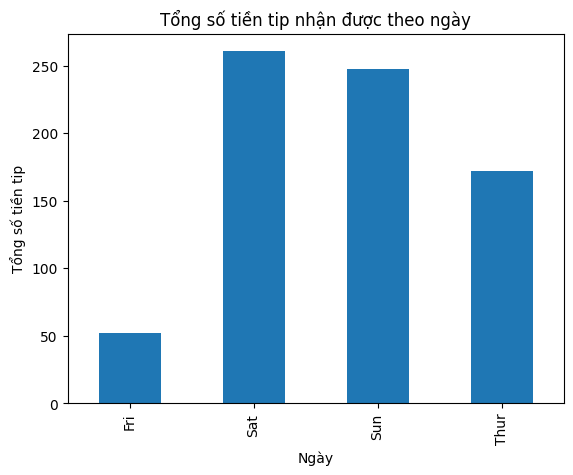

In [102]:
# 1 số tiền tip nhận được theo ngày
total_tip_by_day.plot(kind='bar')
plt.title('Tổng số tiền tip nhận được theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng số tiền tip')
plt.show()

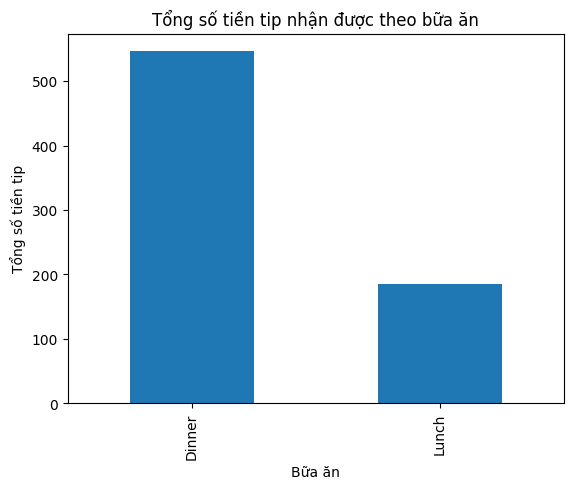

In [103]:
# 2 Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
total_tip_by_time = df.groupby('time')['tip'].sum()
total_tip_by_time.plot(kind='bar')
plt.title('Tổng số tiền tip nhận được theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng số tiền tip')
plt.show()

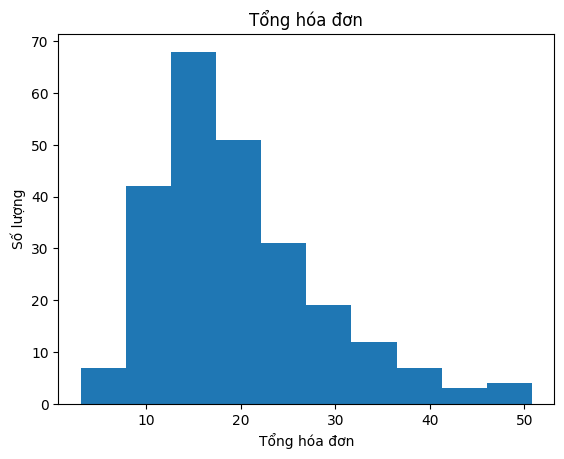

In [104]:
#Vẽ đồ thị histogram của tổng hoá đơn
df['total_bill'].plot(kind='hist')
plt.title('Tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Số lượng')
plt.show()

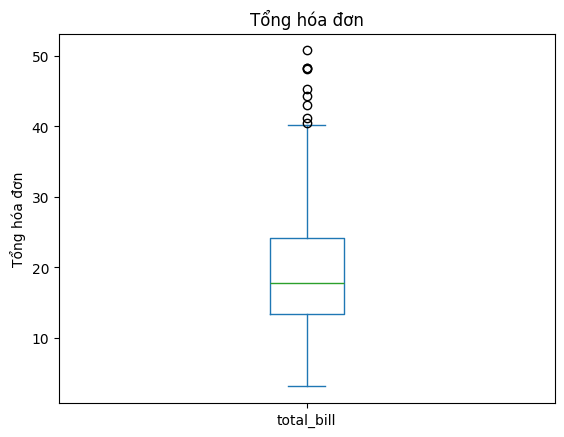

In [105]:
# Vẽ đồ thị boxplot của tổng hoá đơn
df['total_bill'].plot(kind='box')
plt.title('Tổng hóa đơn')
plt.ylabel('Tổng hóa đơn')
plt.show()

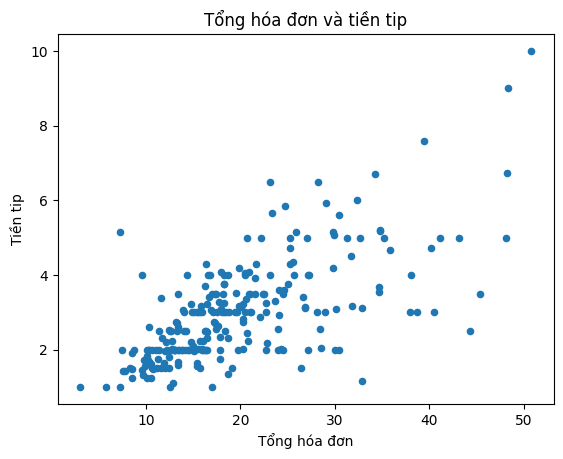

In [106]:
#  Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
df.plot(kind='scatter', x='total_bill', y='tip')
plt.title('Tổng hóa đơn và tiền tip')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Tiền tip')
plt.show()


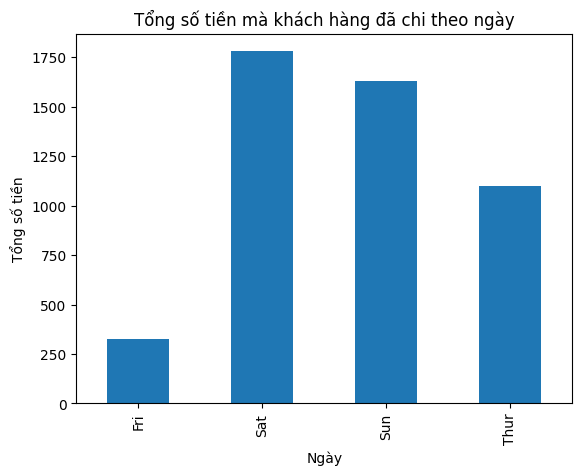

In [107]:
# So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
total_bill_by_day = df.groupby('day')['total_bill'].sum()
total_bill_by_day.plot(kind='bar')
plt.title('Tổng số tiền mà khách hàng đã chi theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng số tiền')
plt.show()

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

In [113]:
import seaborn as sns
import numpy as np

C:\Users\USER\AppData\Local\Temp\ipykernel_13776\4164752985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=df, estimator=np.sum,palette='viridis')


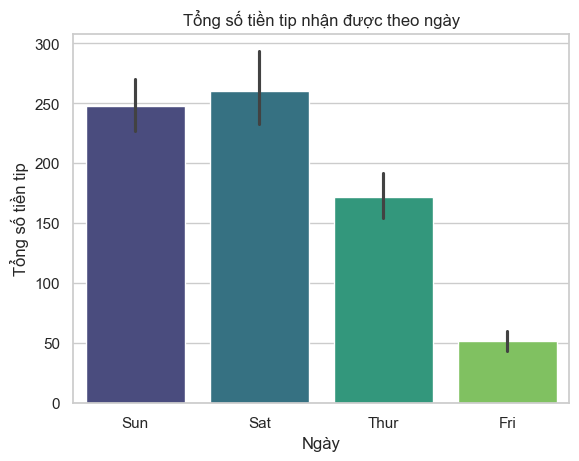

In [154]:
# 1 số tiền tip nhận được theo ngày
sns.barplot(x='day', y='tip', data=df, estimator=np.sum,palette='viridis')
plt.title('Tổng số tiền tip nhận được theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng số tiền tip')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_13776\869773002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time', y='tip', data=df, estimator=np.sum, palette=['red', 'blue'])


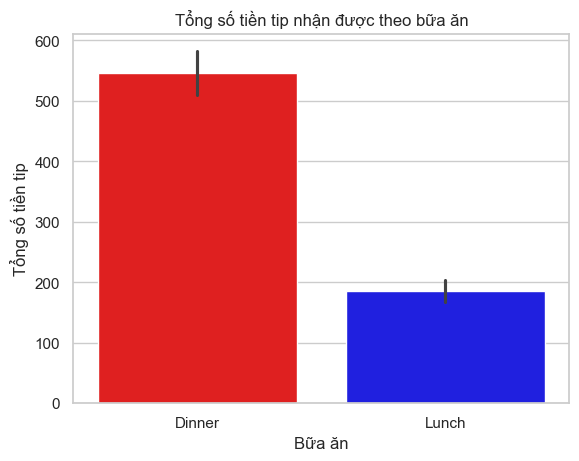

In [153]:
# 2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
sns.barplot(x='time', y='tip', data=df, estimator=np.sum, palette=['red', 'blue'])

plt.title('Tổng số tiền tip nhận được theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng số tiền tip')
plt.show()


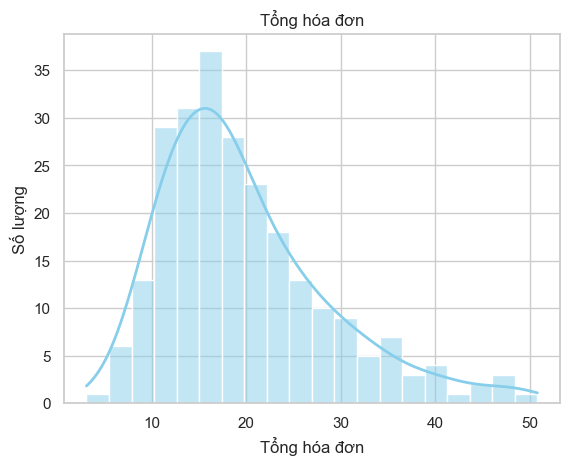

In [148]:
# 3. Vẽ đồ thị histogram của tổng hoá đơn
sns.set(style="whitegrid")
sns.histplot(df['total_bill'], bins=20, kde=True, color='skyblue', line_kws={'linewidth': 2})
plt.title('Tổng hóa đơn')
plt.xlabel('Tổng hóa đơn')
plt.ylabel('Số lượng')
plt.show()

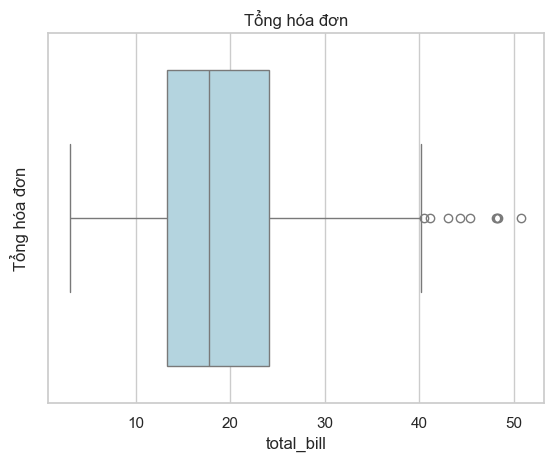

In [143]:
# 4. Vẽ đồ thị boxplot của tổng hoá đơn
sns.set(style="whitegrid")  
sns.boxplot(x=df['total_bill'], color='lightblue')
plt.title('Tổng hóa đơn')
plt.ylabel('Tổng hóa đơn')
plt.show()

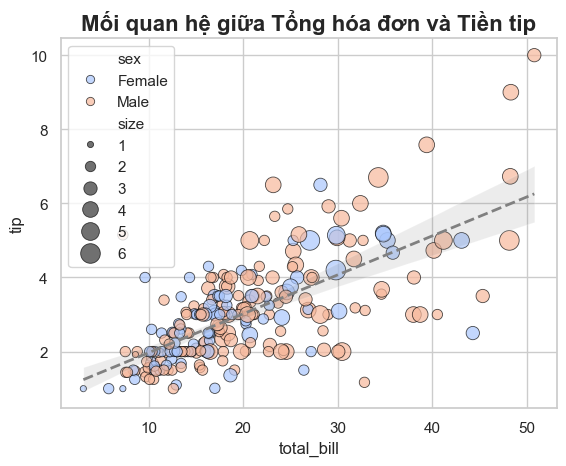

In [130]:
# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', size='size', sizes=(20, 200), palette='coolwarm', alpha=0.7, edgecolor='black')
plt.title('Mối quan hệ giữa Tổng hóa đơn và Tiền tip', fontsize=16, fontweight='bold')
sns.regplot(x='total_bill', y='tip', data=df, scatter=False, color='gray', line_kws={"linewidth": 2, "linestyle": "dashed"})
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_13776\1784192236.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='day', y='total_bill', data=df, estimator=np.sum, ci=None)


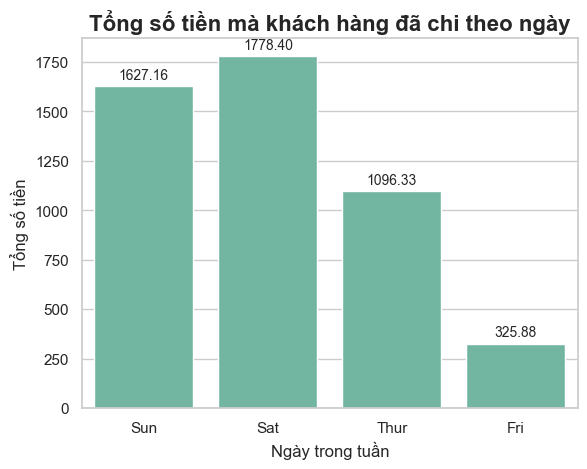

In [140]:
# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
sns.set(style="whitegrid", palette="Set2")
barplot = sns.barplot(x='day', y='total_bill', data=df, estimator=np.sum, ci=None)
plt.title('Tổng số tiền mà khách hàng đã chi theo ngày', fontsize=16, fontweight='bold')
plt.xlabel('Ngày trong tuần', fontsize=12)
plt.ylabel('Tổng số tiền', fontsize=12)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10)
plt.show()
